In [2]:
import tiktoken
import matplotlib.pyplot as plt
import torch

In [3]:
enc = tiktoken.get_encoding("o200k_base")

In [4]:
encoding = tiktoken.encoding_for_model('gpt-3.5-turbo')

In [5]:
enc.decode(enc.encode("hello world")) == "hello world"

True

In [6]:
f = open("code.txt", "r").read()

In [7]:
f[:10]

'/*\n *\n * C'

In [8]:
len(set(encoding.encode(f)))

621

In [9]:
len(set(enc.encode(f)))

625

In [10]:
encoding.encode(f)[:10]

[3364, 1235, 353, 3028, 320, 66, 8, 220, 2366, 16]

In [11]:
for i in encoding.encode(f)[:100]:
    print(encoding.decode([i]))

/*

 *

 *
 Copyright
 (
c
)
 
202
1
-
202
2
 The
 Kh
ron
os
 Group
 Inc
.

 *
 Copyright
 (
c
)
 
202
1
-
202
2
 Valve
 Corporation


 *
 Copyright
 (
c
)
 
202
1
-
202
2
 Lunar
G
,
 Inc
.

 *

 *
 Licensed
 under
 the
 Apache
 License
,
 Version
 
2
.
0
 (
the
 "
License
");

 *
 you
 may
 not
 use
 this
 file
 except
 in
 compliance
 with
 the
 License
.

 *
 You
 may
 obtain
 a
 copy
 of
 the
 License
 at


 *

 *
    
 http
://
www
.apache


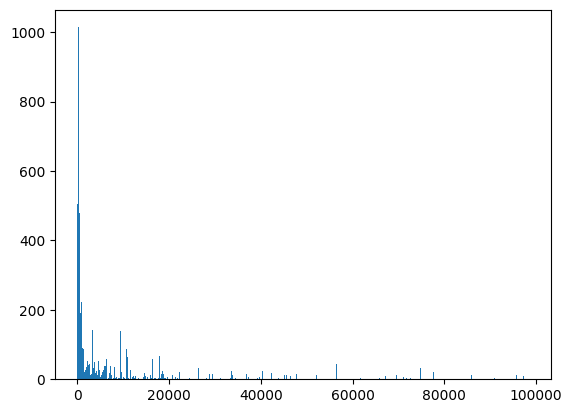

In [12]:
plt.hist(encoding.encode(f), 500);

In [13]:
xs = torch.tensor(encoding.encode(f))

In [14]:
xs.sort()

torch.return_types.sort(
values=tensor([    1,     4,     7,  ..., 97179, 97179, 98294]),
indices=tensor([ 135, 2111, 3930,  ..., 2956, 2753,  189]))

In [15]:
encoding.decode([4])

'%'

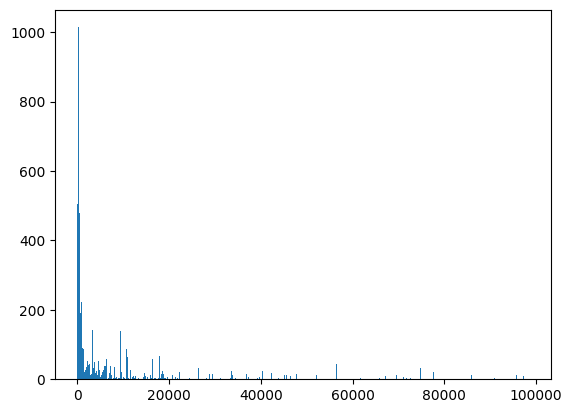

In [16]:
plt.hist(xs.sort()[0][:10000],500);

In [17]:
# posortuj od najwiekszej ilosci powtorzen i wyswietl 10 pierwszych z posortowanej tablicy

In [18]:
p = {}
for i in xs.sort()[0][:10000]:
    #print(i.item())
    #p[i.item()] = 1
    #p.get(i.item()).update({i.item():2})
    p[i.item()] = p.get(i.item(), 0) + 1
    #print(p.get(i.item(), 0))
    #break

In [19]:
sorted(p.items(), key = lambda kv: ~kv[1])

[(9385, 112),
 (11, 95),
 (280, 93),
 (262, 92),
 (948, 89),
 (8, 85),
 (286, 85),
 (3186, 83),
 (320, 82),
 (284, 81),
 (220, 76),
 (341, 75),
 (405, 75),
 (17922, 66),
 (16, 60),
 (310, 57),
 (422, 56),
 (10839, 54),
 (15, 45),
 (45935, 45),
 (471, 44),
 (198, 42),
 (56487, 42),
 (6422, 41),
 (3756, 39),
 (353, 38),
 (16432, 38),
 (17, 37),
 (504, 37),
 (7130, 34),
 (10798, 34),
 (67, 33),
 (74792, 33),
 (394, 32),
 (457, 32),
 (530, 32),
 (843, 32),
 (26492, 32),
 (62, 30),
 (443, 30),
 (1314, 30),
 (8062, 30),
 (2414, 28),
 (4709, 28),
 (10701, 27),
 (366, 26),
 (650, 26),
 (1111, 26),
 (3259, 26),
 (11438, 26),
 (69798, 26),
 (317, 25),
 (279, 23),
 (3567, 23),
 (5701, 23),
 (6239, 23),
 (33612, 23),
 (40353, 23),
 (26, 22),
 (4752, 22),
 (10650, 22),
 (77484, 22),
 (322, 21),
 (335, 21),
 (775, 21),
 (330, 20),
 (345, 20),
 (851, 20),
 (6042, 20),
 (22285, 20),
 (1857, 18),
 (58, 17),
 (369, 16),
 (1912, 16),
 (2325, 16),
 (9245, 16),
 (18385, 16),
 (36787, 16),
 (482, 15),
 (557

In [20]:
cut = []
s = sorted(p.items(), key = lambda kv: ~kv[1])
for i in s[:30]:
    print(i[0], encoding.decode([i[0]]), " \t\t\t--> [ ", i[1], " ]", " len: ", len(encoding.decode([i[0]])) )
    cut.append(i[0])
    #if len(encoding.decode([i[0]])) == 1:
    #    print(" ord [1] value to check character type : ", ord(encoding.decode([i[0]])), ord(encoding.decode([i[0]])))
    #if len(encoding.decode([i[0]])) == 2:
        #print(" ord [2] value to check character type : ", encoding.decode([i[0]]) )
    #encoding.decode([i])

9385 _device  			--> [  112  ]  len:  7
11 ,  			--> [  95  ]  len:  1
280 ;
  			--> [  93  ]  len:  2
262      			--> [  92  ]  len:  3
948 ].  			--> [  89  ]  len:  2
8 )  			--> [  85  ]  len:  1
286          			--> [  85  ]  len:  7
3186 _info  			--> [  83  ]  len:  5
320  (  			--> [  82  ]  len:  2
284  =  			--> [  81  ]  len:  2
220    			--> [  76  ]  len:  1
341  {
  			--> [  75  ]  len:  3
405 ->  			--> [  75  ]  len:  2
17922 _term  			--> [  66  ]  len:  5
16 1  			--> [  60  ]  len:  1
310              			--> [  57  ]  len:  11
422  if  			--> [  56  ]  len:  3
10839  sorted  			--> [  54  ]  len:  7
15 0  			--> [  45  ]  len:  1
45935 _props  			--> [  45  ]  len:  6
471  return  			--> [  44  ]  len:  7
198 
  			--> [  42  ]  len:  1
56487 pci  			--> [  42  ]  len:  3
6422 _group  			--> [  41  ]  len:  6
3756  device  			--> [  39  ]  len:  7
353  *  			--> [  38  ]  len:  2
16432  loader  			--> [  38  ]  len:  7
17 2  			--> [  37  ]  len:  1
504             

In [21]:
for i in encoding.decode([286]):
    print(ord(i))


32
32
32
32
32
32
32


In [22]:
print(set(cut))

{17922, 262, 8, 11, 15, 16, 17, 405, 6422, 280, 284, 286, 422, 56487, 9385, 3756, 16432, 948, 310, 320, 198, 341, 10839, 471, 7130, 220, 353, 45935, 3186, 504}


In [23]:
# wyszukaj wszystkie powtorzenia w tekscie code.txt i wytnij je oraz zapisz jako out.txt

In [24]:
print(encoding.encode(f)[:100])

[3364, 1235, 353, 3028, 320, 66, 8, 220, 2366, 16, 12, 2366, 17, 578, 20774, 2298, 437, 5856, 4953, 627, 353, 3028, 320, 66, 8, 220, 2366, 16, 12, 2366, 17, 45393, 13332, 198, 353, 3028, 320, 66, 8, 220, 2366, 16, 12, 2366, 17, 79195, 38, 11, 4953, 627, 1235, 353, 10311, 1234, 279, 9091, 1914, 11, 6207, 220, 17, 13, 15, 320, 1820, 330, 10028, 803, 353, 499, 1253, 539, 1005, 420, 1052, 3734, 304, 8907, 449, 279, 1914, 627, 353, 1472, 1253, 6994, 264, 3048, 315, 279, 1914, 520, 198, 1235, 353, 257, 1795, 1129, 2185, 5206]


In [25]:
"""
new_str = ""
count = 0
line = 0
for i in encoding.encode(f)[:100]:
    print(i)
    for k in set(cut):
        print( " k ==> ", k) 
        if i == k:
            print(line)
            new_str += ".........."
            count += 1
            break
        if i != k:
            new_str += encoding.decode([i])
            break
            
    line += 1
    #print(i, encoding.decode([i]))
"""

new_str = ""
count = 0
line = 0
x = 0
list_of_indexes = []
for k in sorted(set(cut)):
    for i in encoding.encode(f)[:100]:
        #print("              ", k, i, (k == i))
        if (k == i):
            print(x, k, i)
            #new_str += "....."
            list_of_indexes.append(x)
        #else:
            #new_str += encoding.decode([i])
            
        x += 1
            
    x = 0

6 8 8
24 8 8
38 8 8
47 11 11
57 11 11
62 15 15
9 16 16
27 16 16
41 16 16
12 17 17
30 17 17
44 17 17
60 17 17
33 198 198
92 198 198
7 220 220
25 220 220
39 220 220
59 220 220
4 320 320
22 320 320
36 320 320
63 320 320
2 353 353
20 353 353
34 353 353
51 353 353
68 353 353
82 353 353
94 353 353


In [26]:
print(encoding.encode(f)[:100])

[3364, 1235, 353, 3028, 320, 66, 8, 220, 2366, 16, 12, 2366, 17, 578, 20774, 2298, 437, 5856, 4953, 627, 353, 3028, 320, 66, 8, 220, 2366, 16, 12, 2366, 17, 45393, 13332, 198, 353, 3028, 320, 66, 8, 220, 2366, 16, 12, 2366, 17, 79195, 38, 11, 4953, 627, 1235, 353, 10311, 1234, 279, 9091, 1914, 11, 6207, 220, 17, 13, 15, 320, 1820, 330, 10028, 803, 353, 499, 1253, 539, 1005, 420, 1052, 3734, 304, 8907, 449, 279, 1914, 627, 353, 1472, 1253, 6994, 264, 3048, 315, 279, 1914, 520, 198, 1235, 353, 257, 1795, 1129, 2185, 5206]


In [27]:
count / len(set(cut))

0.0

In [28]:
count

0

In [29]:
nw_s = ""

In [30]:
print(sorted(list_of_indexes)[3:])

[7, 9, 12, 20, 22, 24, 25, 27, 30, 33, 34, 36, 38, 39, 41, 44, 47, 51, 57, 59, 60, 62, 63, 68, 82, 92, 94]


In [31]:
print(sorted(list_of_indexes[-4:]))

[51, 68, 82, 94]


In [32]:
a = len(list_of_indexes)
o = 0
while a != 0:
    for i in sorted(list_of_indexes)[o:]:
        print(o, i)
    a -= 1
    o += 1

0 2
0 4
0 6
0 7
0 9
0 12
0 20
0 22
0 24
0 25
0 27
0 30
0 33
0 34
0 36
0 38
0 39
0 41
0 44
0 47
0 51
0 57
0 59
0 60
0 62
0 63
0 68
0 82
0 92
0 94
1 4
1 6
1 7
1 9
1 12
1 20
1 22
1 24
1 25
1 27
1 30
1 33
1 34
1 36
1 38
1 39
1 41
1 44
1 47
1 51
1 57
1 59
1 60
1 62
1 63
1 68
1 82
1 92
1 94
2 6
2 7
2 9
2 12
2 20
2 22
2 24
2 25
2 27
2 30
2 33
2 34
2 36
2 38
2 39
2 41
2 44
2 47
2 51
2 57
2 59
2 60
2 62
2 63
2 68
2 82
2 92
2 94
3 7
3 9
3 12
3 20
3 22
3 24
3 25
3 27
3 30
3 33
3 34
3 36
3 38
3 39
3 41
3 44
3 47
3 51
3 57
3 59
3 60
3 62
3 63
3 68
3 82
3 92
3 94
4 9
4 12
4 20
4 22
4 24
4 25
4 27
4 30
4 33
4 34
4 36
4 38
4 39
4 41
4 44
4 47
4 51
4 57
4 59
4 60
4 62
4 63
4 68
4 82
4 92
4 94
5 12
5 20
5 22
5 24
5 25
5 27
5 30
5 33
5 34
5 36
5 38
5 39
5 41
5 44
5 47
5 51
5 57
5 59
5 60
5 62
5 63
5 68
5 82
5 92
5 94
6 20
6 22
6 24
6 25
6 27
6 30
6 33
6 34
6 36
6 38
6 39
6 41
6 44
6 47
6 51
6 57
6 59
6 60
6 62
6 63
6 68
6 82
6 92
6 94
7 22
7 24
7 25
7 27
7 30
7 33
7 34
7 36
7 38
7 39
7 41
7 44
7 47
7 51


In [33]:
print(sorted(list_of_indexes))

[2, 4, 6, 7, 9, 12, 20, 22, 24, 25, 27, 30, 33, 34, 36, 38, 39, 41, 44, 47, 51, 57, 59, 60, 62, 63, 68, 82, 92, 94]


In [34]:
print(encoding.encode(f)[:100])

[3364, 1235, 353, 3028, 320, 66, 8, 220, 2366, 16, 12, 2366, 17, 578, 20774, 2298, 437, 5856, 4953, 627, 353, 3028, 320, 66, 8, 220, 2366, 16, 12, 2366, 17, 45393, 13332, 198, 353, 3028, 320, 66, 8, 220, 2366, 16, 12, 2366, 17, 79195, 38, 11, 4953, 627, 1235, 353, 10311, 1234, 279, 9091, 1914, 11, 6207, 220, 17, 13, 15, 320, 1820, 330, 10028, 803, 353, 499, 1253, 539, 1005, 420, 1052, 3734, 304, 8907, 449, 279, 1914, 627, 353, 1472, 1253, 6994, 264, 3048, 315, 279, 1914, 520, 198, 1235, 353, 257, 1795, 1129, 2185, 5206]


In [35]:
new_str = ""
count = 0
line = 0
x = 0
list_of_indexes = []
for k in sorted(set(cut)):
    for i in encoding.encode(f)[:1000]:
        #print("              ", k, i, (k == i))
        if (k == i):
            #print(x, k, i)
            #new_str += "....."
            list_of_indexes.append(x)
        #else:
            #new_str += encoding.decode([i])
            
        x += 1
            
    x = 0

In [36]:
n = 0
s = ""
u = 0

for i in encoding.encode(f)[:1000]:
    try:
        if n == sorted(list_of_indexes)[u:][0]:
            #print(i, n)
            s += "|...|"
            u += 1
        else:
            s += encoding.decode([i])
    except IndexError:
        #print("done")
        break
    n += 1

In [37]:
sorted(list_of_indexes)[0:][0]

2

In [38]:
n=0

In [39]:
sorted(list_of_indexes)[n:][0]

2

In [40]:
s

'/*\n *\n|...| Copyright|...|c|...||...|202|...|-202|...| The Khronos Group Inc.\n|...| Copyright|...|c|...||...|202|...|-202|...| Valve Corporation|...||...| Copyright|...|c|...||...|202|...|-202|...| LunarG|...| Inc.\n *\n|...| Licensed under the Apache License|...| Version|...||...|.|...||...|the "License");\n|...| you may not use this file except in compliance with the License.\n|...| You may obtain a copy of the License at|...| *\n|...|     http://www.apache.org/licenses/LICENSE-|...|.|...||...| *\n|...| Unless required by applicable law or agreed to in writing|...| software|...||...| distributed under the License is distributed on an "AS IS" BASIS,\n|...| WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND|...| either express or implied.\n|...| See the License for the specific language governing permissions and|...||...| limitations under the License.\n *\n|...| Author: Mark Young <marky@lunarg.com>\n *\n */\n\n// Non-windows and non-apple only header file|...| guard it so that accident

In [41]:
lines = []
st = ""
for l in s:
    if l == '\n':
        st += '\n'
        lines.append(st)
        st = ""
    else:
       st += l 

In [42]:
fwrite = open("out.txt", "w")
for line in lines:
    fwrite.write(line)
fwrite.close()

In [43]:
f[:5000]

'/*\n *\n * Copyright (c) 2021-2022 The Khronos Group Inc.\n * Copyright (c) 2021-2022 Valve Corporation\n * Copyright (c) 2021-2022 LunarG, Inc.\n *\n * Licensed under the Apache License, Version 2.0 (the "License");\n * you may not use this file except in compliance with the License.\n * You may obtain a copy of the License at\n *\n *     http://www.apache.org/licenses/LICENSE-2.0\n *\n * Unless required by applicable law or agreed to in writing, software\n * distributed under the License is distributed on an "AS IS" BASIS,\n * WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.\n * See the License for the specific language governing permissions and\n * limitations under the License.\n *\n * Author: Mark Young <marky@lunarg.com>\n *\n */\n\n// Non-windows and non-apple only header file, guard it so that accidental\n// inclusion doesn\'t cause unknown header include errors\n#if defined(LOADER_ENABLE_LINUX_SORT)\n\n#include <stdio.h>\n#include <stdlib.h>\n\n#includ

In [44]:
# I co z tego wyciągnałem, jaką wiedzę... XD
# że to trzeba jednak liniami robić.
# czyli kurwa mać wszystko od nowa ... 

In [45]:
f = open("code.txt", "r").readlines()

In [46]:
LINES_LENGTH = 20

In [47]:
for line in f[:LINES_LENGTH]:
    print(encoding.encode(line))

[3364]
[1235]
[353, 3028, 320, 66, 8, 220, 2366, 16, 12, 2366, 17, 578, 20774, 2298, 437, 5856, 4953, 627]
[353, 3028, 320, 66, 8, 220, 2366, 16, 12, 2366, 17, 45393, 13332, 198]
[353, 3028, 320, 66, 8, 220, 2366, 16, 12, 2366, 17, 79195, 38, 11, 4953, 627]
[1235]
[353, 10311, 1234, 279, 9091, 1914, 11, 6207, 220, 17, 13, 15, 320, 1820, 330, 10028, 803]
[353, 499, 1253, 539, 1005, 420, 1052, 3734, 304, 8907, 449, 279, 1914, 627]
[353, 1472, 1253, 6994, 264, 3048, 315, 279, 1914, 520, 198]
[1235]
[353, 257, 1795, 1129, 2185, 5206, 2726, 7116, 11082, 12, 17, 13, 15, 198]
[1235]
[353, 11115, 2631, 555, 8581, 2383, 477, 7378, 311, 304, 4477, 11, 3241, 198]
[353, 4332, 1234, 279, 1914, 374, 4332, 389, 459, 330, 1950, 3507, 1, 11643, 345]
[353, 6135, 7579, 2794, 11596, 3083, 4230, 9481, 11, 3060, 3237, 477, 6259, 627]
[353, 3580, 279, 1914, 369, 279, 3230, 4221, 10217, 8709, 323, 198]
[353, 9669, 1234, 279, 1914, 627]
[1235]
[353, 7030, 25, 4488, 13566, 366, 4075, 88, 31, 75, 359, 867, 916, 

In [48]:
f[:LINES_LENGTH]

['/*\n',
 ' *\n',
 ' * Copyright (c) 2021-2022 The Khronos Group Inc.\n',
 ' * Copyright (c) 2021-2022 Valve Corporation\n',
 ' * Copyright (c) 2021-2022 LunarG, Inc.\n',
 ' *\n',
 ' * Licensed under the Apache License, Version 2.0 (the "License");\n',
 ' * you may not use this file except in compliance with the License.\n',
 ' * You may obtain a copy of the License at\n',
 ' *\n',
 ' *     http://www.apache.org/licenses/LICENSE-2.0\n',
 ' *\n',
 ' * Unless required by applicable law or agreed to in writing, software\n',
 ' * distributed under the License is distributed on an "AS IS" BASIS,\n',
 ' * WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.\n',
 ' * See the License for the specific language governing permissions and\n',
 ' * limitations under the License.\n',
 ' *\n',
 ' * Author: Mark Young <marky@lunarg.com>\n',
 ' *\n']

In [49]:
encoding.decode([79195])

' Lunar'

In [50]:
arr = []
for line in f[:LINES_LENGTH]:
    for x in (encoding.encode(line)):
        #print(x)
        arr.append(x)

In [51]:
print(arr)

[3364, 1235, 353, 3028, 320, 66, 8, 220, 2366, 16, 12, 2366, 17, 578, 20774, 2298, 437, 5856, 4953, 627, 353, 3028, 320, 66, 8, 220, 2366, 16, 12, 2366, 17, 45393, 13332, 198, 353, 3028, 320, 66, 8, 220, 2366, 16, 12, 2366, 17, 79195, 38, 11, 4953, 627, 1235, 353, 10311, 1234, 279, 9091, 1914, 11, 6207, 220, 17, 13, 15, 320, 1820, 330, 10028, 803, 353, 499, 1253, 539, 1005, 420, 1052, 3734, 304, 8907, 449, 279, 1914, 627, 353, 1472, 1253, 6994, 264, 3048, 315, 279, 1914, 520, 198, 1235, 353, 257, 1795, 1129, 2185, 5206, 2726, 7116, 11082, 12, 17, 13, 15, 198, 1235, 353, 11115, 2631, 555, 8581, 2383, 477, 7378, 311, 304, 4477, 11, 3241, 198, 353, 4332, 1234, 279, 1914, 374, 4332, 389, 459, 330, 1950, 3507, 1, 11643, 345, 353, 6135, 7579, 2794, 11596, 3083, 4230, 9481, 11, 3060, 3237, 477, 6259, 627, 353, 3580, 279, 1914, 369, 279, 3230, 4221, 10217, 8709, 323, 198, 353, 9669, 1234, 279, 1914, 627, 1235, 353, 7030, 25, 4488, 13566, 366, 4075, 88, 31, 75, 359, 867, 916, 397, 1235]


In [52]:
len(arr)

186

In [53]:
k = 1
for i in range(len(arr)):
    if ((len(arr) % k) == 0):
        print(k)
    k += 1

1
2
3
6
31
62
93
186


In [54]:
torch.tensor(arr).view(6, -1).shape

torch.Size([6, 31])

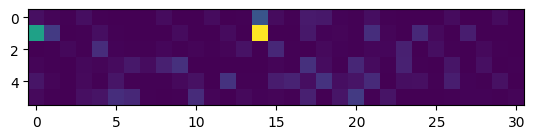

In [55]:
plt.imshow(torch.tensor(arr).view(6, -1))

In [56]:
torch.tensor(arr).min(), torch.tensor(arr).max()

(tensor(1), tensor(79195))

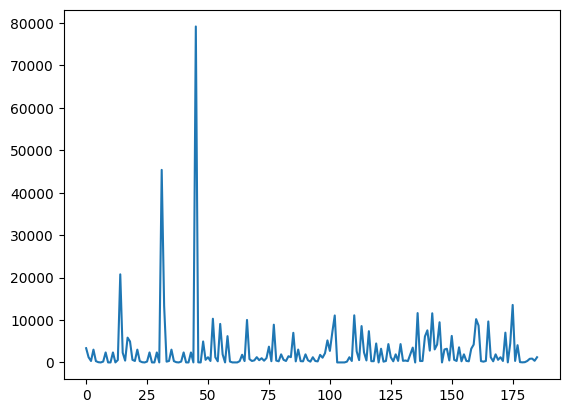

In [57]:
plt.plot(arr);

In [58]:
print(bin(100000))

0b11000011010100000


In [59]:
print(bin(0xffffffff))

0b11111111111111111111111111111111


In [60]:
print(bin(0xffffffff-100000))

0b11111111111111100111100101011111


In [61]:
x = []
for i in arr:
    x.append(0xffffffff-i)
    print(bin(0xffffffff-i))

0b11111111111111111111001011011011
0b11111111111111111111101100101100
0b11111111111111111111111010011110
0b11111111111111111111010000101011
0b11111111111111111111111010111111
0b11111111111111111111111110111101
0b11111111111111111111111111110111
0b11111111111111111111111100100011
0b11111111111111111111011011000001
0b11111111111111111111111111101111
0b11111111111111111111111111110011
0b11111111111111111111011011000001
0b11111111111111111111111111101110
0b11111111111111111111110110111101
0b11111111111111111010111011011001
0b11111111111111111111011100000101
0b11111111111111111111111001001010
0b11111111111111111110100100011111
0b11111111111111111110110010100110
0b11111111111111111111110110001100
0b11111111111111111111111010011110
0b11111111111111111111010000101011
0b11111111111111111111111010111111
0b11111111111111111111111110111101
0b11111111111111111111111111110111
0b11111111111111111111111100100011
0b11111111111111111111011011000001
0b11111111111111111111111111101111
0b111111111111111111

In [75]:
x2 = []
for i in x:
    #print(bin(i)[2:])
    #print(len(bin(i)[2:]))
    for k in bin(i)[2:]:
       x2.append(int(k)) 

In [94]:
len(x2)/32

186.0

In [97]:
xy = torch.tensor(x2).view(186,32)

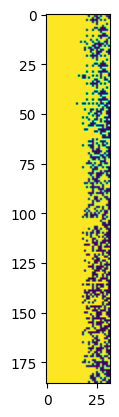

In [100]:
plt.imshow(xy)

In [99]:
xy[0]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
        1, 1, 0, 1, 1, 0, 1, 1])